In [0]:
from google.colab.patches import cv_imshow
import cv2
import numpy as np

In [6]:
!wget https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/ml/PAI.png
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

--2020-05-09 15:13:15--  https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/ml/PAI.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210383 (205K) [image/png]
Saving to: ‘PAI.png.1’

PAI.png.1           100%[===================>] 205.45K  --.-KB/s    in 0.05s   

2020-05-09 15:13:15 (3.91 MB/s) - ‘PAI.png.1’ saved [210383/210383]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB 

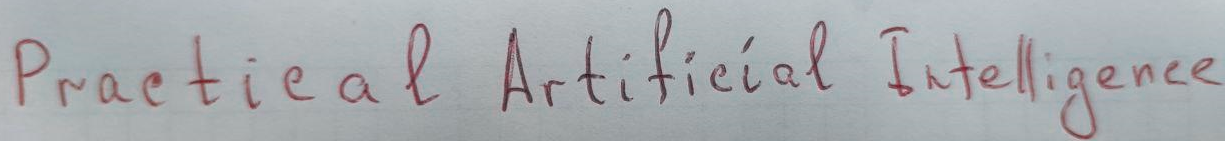

In [7]:
img = cv2.imread('PAI.png',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv_imshow(img)

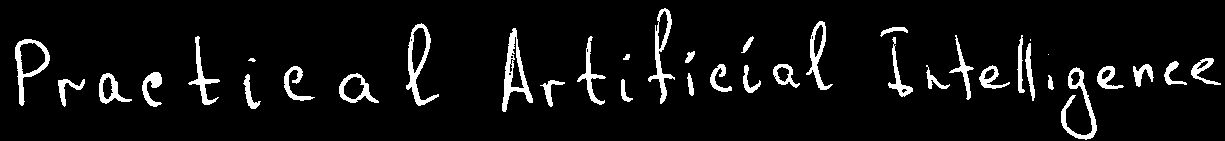

In [8]:
# use https://imagecolorpicker.com/ to approximate the color range
imgRng = cv2.inRange(img, (0,0,0), (140,140,180))
cv_imshow(imgRng)

In [9]:
imgmod = cv2.medianBlur(imgRng, 5)
cv2.imwrite('pai_mod.png',imgmod)
string = !tesseract pai_mod.png stdout --psm 13
print(string)
string = string[1]
print(string)

['Warning. Invalid resolution 0 dpi. Using 70 instead.', 'Practical Aetifieial Toeligence', '']
Practical Aetifieial Toeligence


In [1]:
import requests, json

In [0]:
yandex_speller_api = "https://speller.yandex.net/services/spellservice.json/checkText"

def check_word(json_api, word):
    ret = json.loads(requests.post(yandex_speller_api, data={"text":word}).text)
    if not ret:
        return word
    else:
        return ret[0]['s'][0]

In [14]:
final_string = [check_word(yandex_speller_api, spl) for spl in string.split()]
print(' '.join(final_string))

Practical Artificial Intelligence
